# Cardiocascular Death Regression Analysis

---

# Importing Data Dependables

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error


# To surpress warnings
import warnings
warnings.filterwarnings('ignore')

In [140]:
# importing the datasets for the task

df = pd.read_csv(r"C:\Users\rave_consolidate\Desktop\cadiovascular_death\dataset\final_merge.csv")
df.head()

,Entity,Code,Year,tempchange,CO2,Deaths
0,Afghanistan,AFG,1990,0.000894,14209854.0,373.796590
1,Afghanistan,AFG,1991,0.000891,14436271.0,266.298725
2,Afghanistan,AFG,1992,0.000891,13517736.0,224.447196
3,Afghanistan,AFG,1993,0.000890,12913293.0,278.393699
4,Afghanistan,AFG,1994,0.000888,13214674.0,370.591181


# Data Preparation and Preprocessing

In [141]:
df_test = pd.read_csv(r"C:\Users\rave_consolidate\Desktop\cadiovascular_death\dataset\company_test_data.csv")
df_test.head()

,Company Name,Ticker,ISIN,GHG,Emissions,Predicted Value
0,Acciona,ANA,ES0125220311,CO2,306905.00,4.248217e-06
1,Acciona Energia,ANE,ES0105563003,CO2,55276.00,5.498951e-07
2,Acerinox,ACX,ES0132105018,CO2,4333367.00,5.412198e-05
3,Aena,AENA,ES0105046009,CO2,51516.69,1.100690e-06
4,Amadeus IT Group,AMS,ES0109067019,CO2,13152.00,2.369140e-07


In [142]:
# Trainset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6144 entries, 0 to 6143
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entity      6144 non-null   object 
 1   Code        6144 non-null   object 
 2   Year        6144 non-null   int64  
 3   tempchange  6144 non-null   float64
 4   CO2         6144 non-null   float64
 5   Deaths      6144 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 288.1+ KB


In [143]:
# Testset info

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company Name     35 non-null     object 
 1   Ticker           35 non-null     object 
 2   ISIN             35 non-null     object 
 3   GHG              35 non-null     object 
 4   Emissions        35 non-null     float64
 5   Predicted Value  35 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.8+ KB


In [144]:
# checking the number of columns and rows for the trainset

print(f"The total number of rows is: {df.shape[0]}")
print(f"The total number of columns is: {df.shape[1]}")

# checking the number of columns and rows for the testset

print(f"The total number of rows is: {df_test.shape[0]}")
print(f"The total number of columns is: {df_test.shape[1]}")

The total number of rows is: 6144
The total number of columns is: 6
The total number of rows is: 35
The total number of columns is: 6


In [217]:
# total number of countries in the dataset
num_countries = df.code.nunique()
print(f"There are a total of {num_countries} countries in the dataset")

There are a total of 192 countries in the dataset


In [145]:
# checking for null values

df.isnull().sum()

Entity        0
Code          0
Year          0
tempchange    0
CO2           0
Deaths        0
dtype: int64

In [146]:
# Rename columns (Deaths to cardio_deaths and tempchange to temp_change)

df.columns = ['country', 'code', 'year', 'temp_change', 'CO2', 'cardio_deaths']

In [147]:
df.head()

,country,code,year,temp_change,CO2,cardio_deaths
0,Afghanistan,AFG,1990,0.000894,14209854.0,373.796590
1,Afghanistan,AFG,1991,0.000891,14436271.0,266.298725
2,Afghanistan,AFG,1992,0.000891,13517736.0,224.447196
3,Afghanistan,AFG,1993,0.000890,12913293.0,278.393699
4,Afghanistan,AFG,1994,0.000888,13214674.0,370.591181


In [148]:
# rename columns (emissions to CO2 and predicted values to temp_change)

df_test.columns = ['company_name', 'ticker', 'ISIN', 'GHG', 'CO2',
       'temp_change']
df_test.head()

,company_name,ticker,ISIN,GHG,CO2,temp_change
0,Acciona,ANA,ES0125220311,CO2,306905.00,4.248217e-06
1,Acciona Energia,ANE,ES0105563003,CO2,55276.00,5.498951e-07
2,Acerinox,ACX,ES0132105018,CO2,4333367.00,5.412198e-05
3,Aena,AENA,ES0105046009,CO2,51516.69,1.100690e-06
4,Amadeus IT Group,AMS,ES0109067019,CO2,13152.00,2.369140e-07


In [149]:
# fro the test data, Create the country, code, date 
df_test['country'] = 'Spain'
df_test['code'] = 'ESP'
df_test['year'] = 2022

In [150]:
df_test.head()

,company_name,ticker,ISIN,GHG,CO2,temp_change,country,code,year
0,Acciona,ANA,ES0125220311,CO2,306905.00,4.248217e-06,Spain,ESP,2022
1,Acciona Energia,ANE,ES0105563003,CO2,55276.00,5.498951e-07,Spain,ESP,2022
2,Acerinox,ACX,ES0132105018,CO2,4333367.00,5.412198e-05,Spain,ESP,2022
3,Aena,AENA,ES0105046009,CO2,51516.69,1.100690e-06,Spain,ESP,2022
4,Amadeus IT Group,AMS,ES0109067019,CO2,13152.00,2.369140e-07,Spain,ESP,2022


#### Dropping unwanted features from the data sets

- drop country since we already have country code as Code
- drop company_name, ticker, ISIN, GHG

In [151]:
# Drop the country column in the trainset (df)

df = df.drop("country", axis=1)

In [152]:
# Drop the company_name, ticker, ISIN, GHG for the testset

df_test = df_test.drop(["country","company_name", "ticker", "ISIN", "GHG"], axis=1)

In [153]:
df = df[["year", "code", "temp_change", "CO2", "cardio_deaths"]]
df_test = df_test[["year", "code", "temp_change", "CO2"]]

In [154]:
df.head()

,year,code,temp_change,CO2,cardio_deaths
0,1990,AFG,0.000894,14209854.0,373.796590
1,1991,AFG,0.000891,14436271.0,266.298725
2,1992,AFG,0.000891,13517736.0,224.447196
3,1993,AFG,0.000890,12913293.0,278.393699
4,1994,AFG,0.000888,13214674.0,370.591181


In [155]:
df_test.head()

,year,code,temp_change,CO2
0,2022,ESP,4.248217e-06,306905.00
1,2022,ESP,5.498951e-07,55276.00
2,2022,ESP,5.412198e-05,4333367.00
3,2022,ESP,1.100690e-06,51516.69
4,2022,ESP,2.369140e-07,13152.00


In [156]:
# checking for duplicates values
trainset_duplicate = df.duplicated().sum()
print(f"Total Number of Duplicates in trainset is: {trainset_duplicate}")

testset_duplicate = df_test.duplicated().sum()
print(f"Total Number of Duplicates in testset is: {testset_duplicate}")

Total Number of Duplicates in trainset is: 0
Total Number of Duplicates in testset is: 0


# Exploratory Data Analysis

#### Univariate Analysis

---

In [157]:
df.head()

,year,code,temp_change,CO2,cardio_deaths
0,1990,AFG,0.000894,14209854.0,373.796590
1,1991,AFG,0.000891,14436271.0,266.298725
2,1992,AFG,0.000891,13517736.0,224.447196
3,1993,AFG,0.000890,12913293.0,278.393699
4,1994,AFG,0.000888,13214674.0,370.591181


In [158]:
# Summary statistics

df.describe()

,year,temp_change,CO2,cardio_deaths
count,6144.000000,6.144000e+03,6.144000e+03,6144.000000
mean,2005.500000,6.596998e-03,2.368965e+08,702.342532
std,9.233844,2.211205e-02,8.653753e+08,4238.471687
min,1990.000000,2.270000e-07,-8.858048e+04,-3432.839427
25%,1997.750000,3.450455e-04,9.524310e+06,0.142907
50%,2005.500000,1.391079e-03,4.579474e+07,22.244704
75%,2013.250000,4.082338e-03,1.303098e+08,212.606476
max,2021.000000,2.800604e-01,1.377427e+10,95031.021970


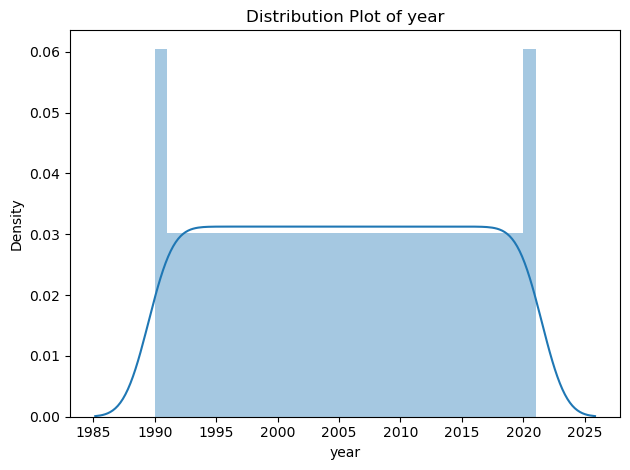

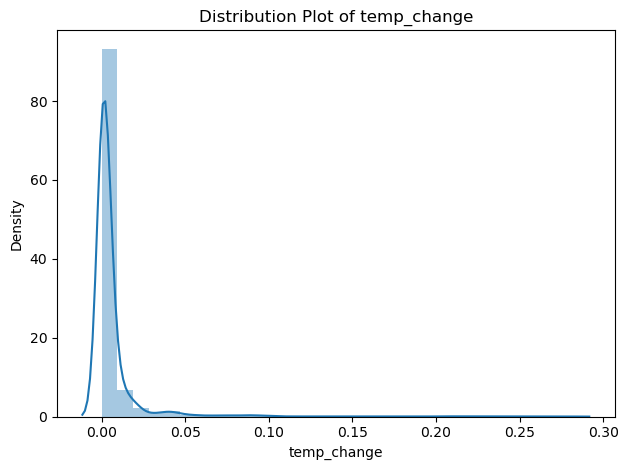

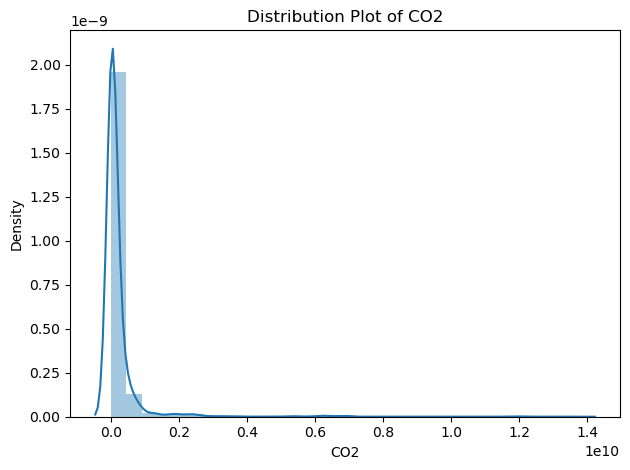

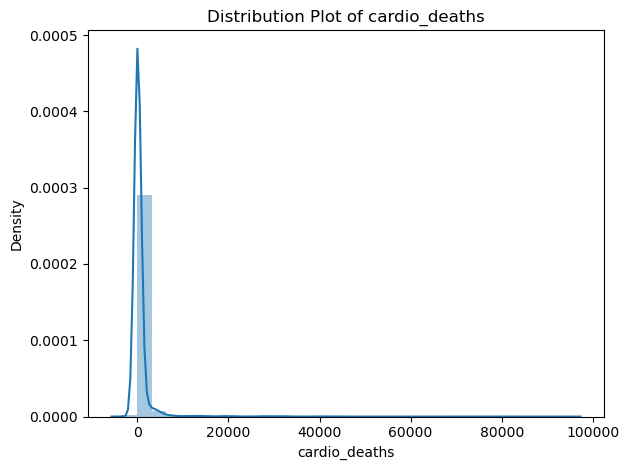

In [164]:
# Plot histograms for each numerical column
for col in df.select_dtypes(exclude="object"):
    # plt.figure(figsize=(12, 5))
    sns.distplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Distribution Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

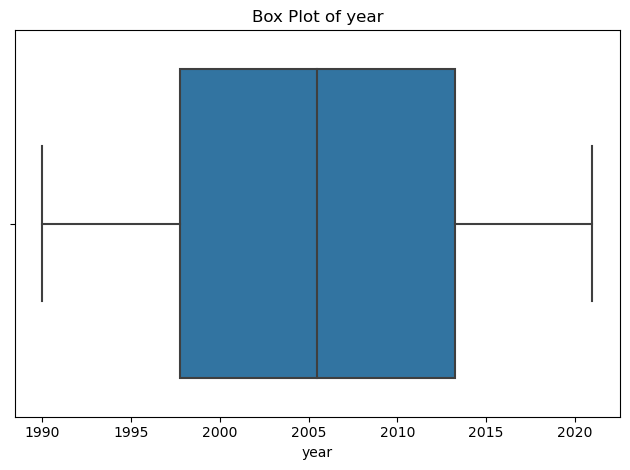

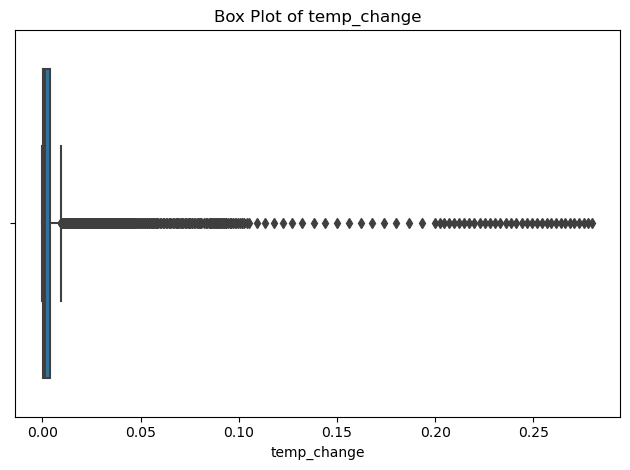

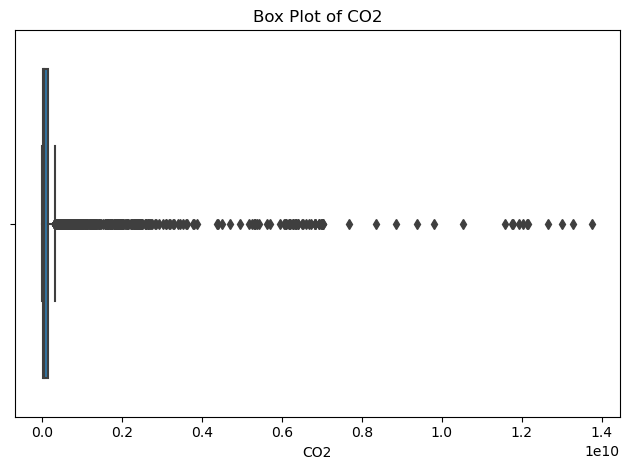

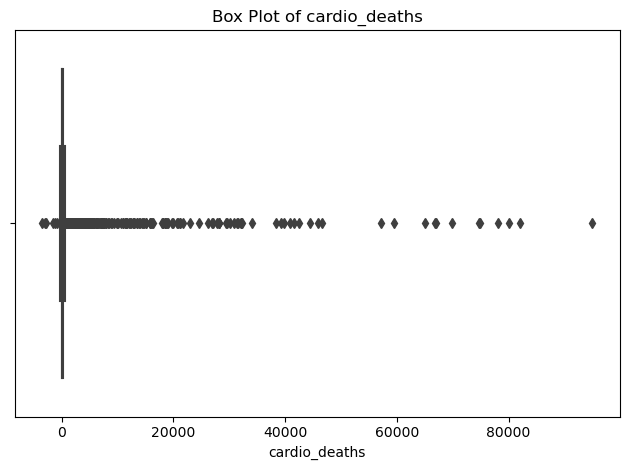

In [165]:
# for boxplot for each numerical column, run a for loop to plot box plot for each colum

for col in df.select_dtypes(exclude="object"):
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

### Observations

1. **Year**
   - **Mean**: 2005.5
     - The average year in the dataset is 2005.5.
   - **Standard Deviation (std)**: 9.233844
     - There is a reasonable variation in the years, consistent with a 31-year range.
   - **Range**: 1990 to 2021
     - The data spans from 1990 to 2021.

2. **temp_change**
   - **Mean**: 0.006597
     - The average temperature change is 0.006597.
   - **Standard Deviation (std)**: 0.022112
     - Indicates a considerable variation in temperature change.
   - **Range**: 0.000000227 to 0.2800604
     - The smallest temperature change recorded is very close to zero, while the highest is 0.2800604.
   - **Quartiles**:
     - 25% of the records have a temperature change of 0.000345 or less.
     - The median temperature change is 0.001391.
     - 75% of the records have a temperature change of 0.004082 or less.
   - **Skewness**: The high standard deviation and the difference between the mean and the median suggest a right-skewed distribution with some large outliers.

3. **CO2**
   - **Mean**: 236,896,500
     - The average CO2 emission is 236,896,500 units.
   - **Standard Deviation (std)**: 865,375,300
     - Indicates a very high variation in CO2 emissions, suggesting the presence of outliers or a wide range.
   - **Range**: -88,580.48 to 13,774,270,000
     - There are negative values, which might indicate data entry errors or special cases that need investigation, and the maximum value is significantly higher.
   - **Quartiles**:
     - 25% of the records have CO2 emissions of 9,524,310 or less.
     - The median CO2 emission is 45,794,740.
     - 75% of the records have CO2 emissions of 130,309,800 or less.
   - **Skewness**: The very high standard deviation and range, along with the presence of negative values, suggest a need for data cleaning and handling of outliers.

4. **cardio_deaths**
   - **Mean**: 702.342532
     - The average number of cardiovascular deaths is 702.34.
   - **Standard Deviation (std)**: 4238.471687
     - Indicates a very high variation in cardiovascular deaths.
   - **Range**: -3432.839427 to 95,031.021970
     - The presence of negative values suggests possible data issues that need investigation.
   - **Quartiles**:
     - 25% of the records have cardiovascular deaths of 0.142907 or less.
     - The median number of cardiovascular deaths is 22.24.
     - 75% of the records have cardiovascular deaths of 212.61 or less.
   - **Skewness**: The high standard deviation and the difference between the mean and the median indicate the influence of large outliers and a highly skewed distribution.

#### Multivariate Analysis

---

In [179]:
# Calculate the correlation matrix
corr_matrix = df.select_dtypes(exclude="object").corr()
corr_matrix

,year,temp_change,CO2,cardio_deaths
year,1.000000,0.044712,0.033362,0.057536
temp_change,0.044712,1.000000,0.886792,0.350594
CO2,0.033362,0.886792,1.000000,0.486056
cardio_deaths,0.057536,0.350594,0.486056,1.000000


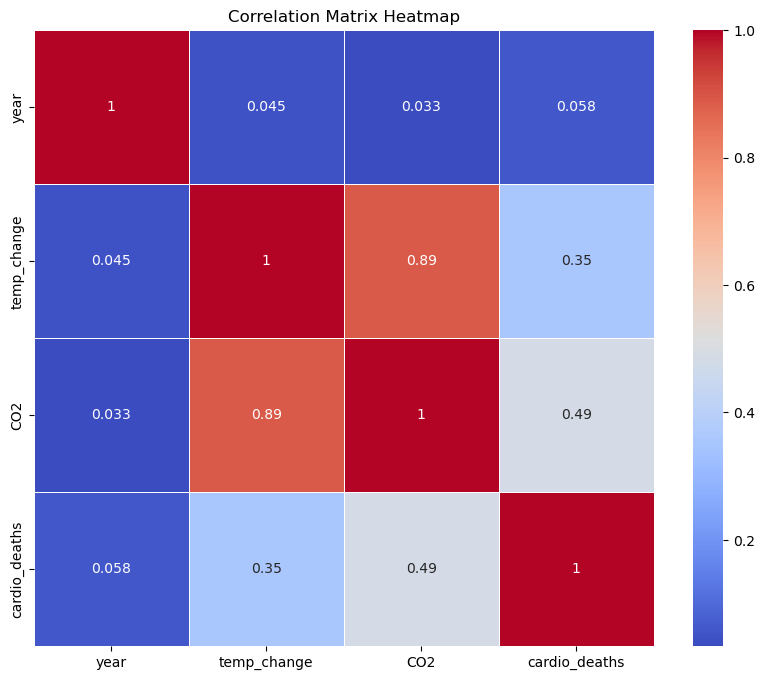

In [178]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

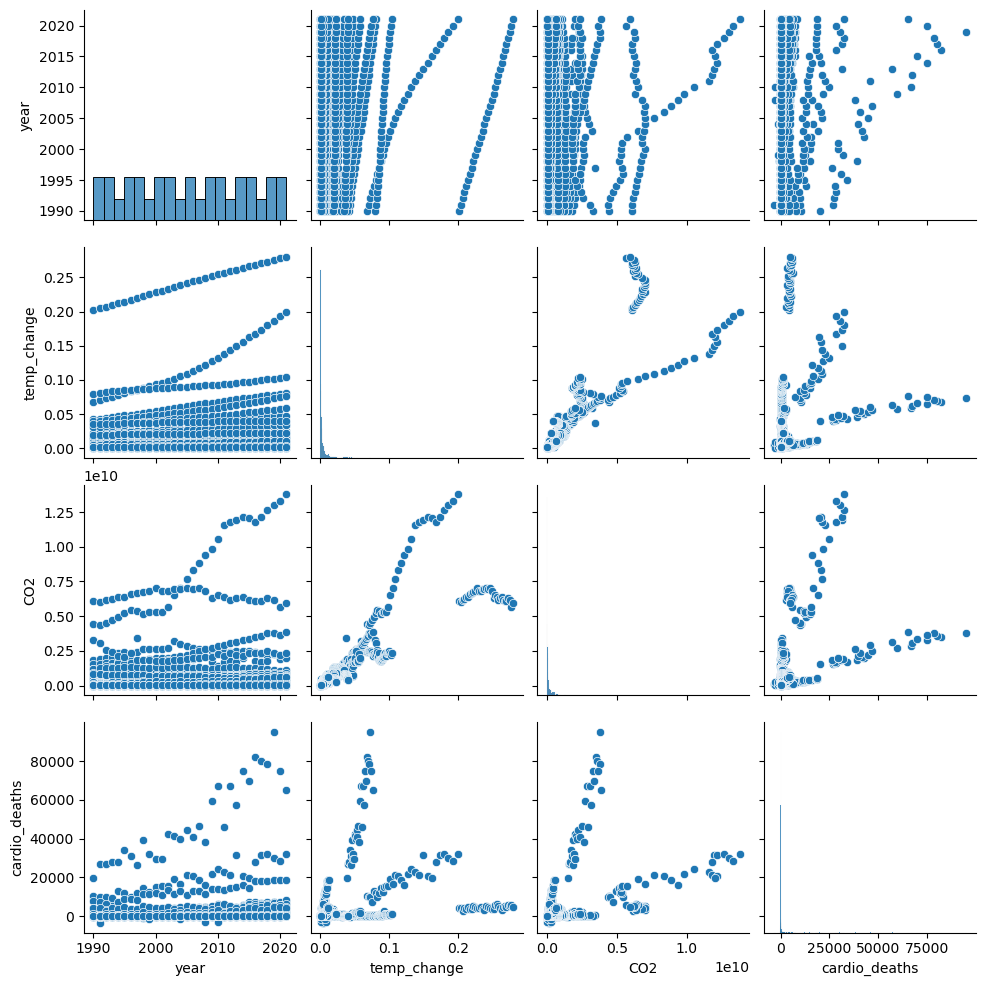

In [180]:
# Pairplots
# Plot the pairplot
sns.pairplot(df)
plt.show()

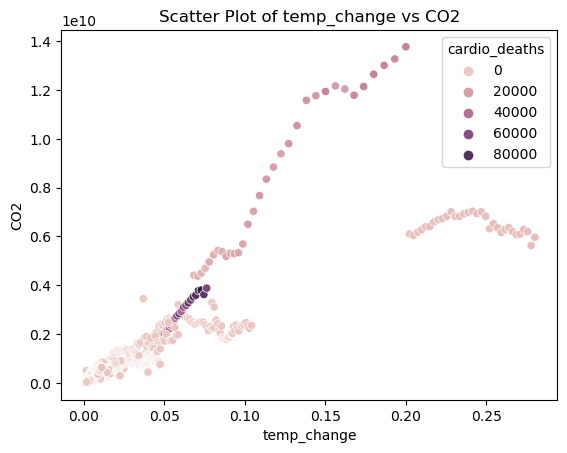

In [181]:
# Scatter plot with 'cardio_deaths' as the hue
sns.scatterplot(x='temp_change', y='CO2', hue='cardio_deaths', data=df)
plt.title('Scatter Plot of temp_change vs CO2')
plt.show()

In [184]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
X_vif = df.select_dtypes(exclude="object")
X_vif['Intercept'] = 1  # Adding a constant for statsmodels
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Drop the intercept from VIF results
vif_data = vif_data[vif_data['Feature'] != 'Intercept']

# Print VIF data
print(vif_data)

         Feature       VIF
0           year  1.005225
1    temp_change  4.884057
2            CO2  5.605162
3  cardio_deaths  1.367533


In [ ]:
# Lets create a function that will remove negative values from the dataset
# Reason they are most likely wrong entries because we cannot have negative carsio_deaths rate or negative carbon emmissions

def remove_negative_values(df):
    """
    This function removes rows containing negative values from a DataFrame.
    
    Args:
    df (pandas.DataFrame): The input DataFrame from which negative values need to be removed.
    
    Returns:
    pandas.DataFrame: A DataFrame with all rows containing negative values removed.
    
    The function works as follows:
    1. Iterates through each column in the DataFrame.
    2. Selects only numerical columns using `select_dtypes(include='number')`.
    3. For each numerical column, filters the DataFrame to keep only rows where the column value is greater than or equal to 0.
    4. Returns the cleaned DataFrame.
    """
    # Iterate through each column in the DataFrame
    for col in df.select_dtypes(include='number'):
        # Remove rows where the column value is negative
        df = df[df[col] >= 0]
    return df

In [ ]:
# Apply the fucntion to the dataset as follows:

df_cleaned = remove_negative_values(df)

In [ ]:
df_cleaned.describe()

,year,temp_change,CO2,cardio_deaths
count,5063.000000,5.063000e+03,5.063000e+03,5.063000e+03
mean,2006.065771,7.629024e-03,2.747584e+08,8.579830e+02
std,9.255356,2.418585e-02,9.468784e+08,4.653683e+03
min,1990.000000,2.270000e-07,5.386318e+03,1.340000e-08
25%,1998.000000,3.740180e-04,1.130943e+07,2.838724e+00
50%,2006.000000,1.611439e-03,5.345478e+07,4.852722e+01
75%,2014.000000,4.818866e-03,1.608677e+08,2.838311e+02
max,2021.000000,2.800604e-01,1.377427e+10,9.503102e+04


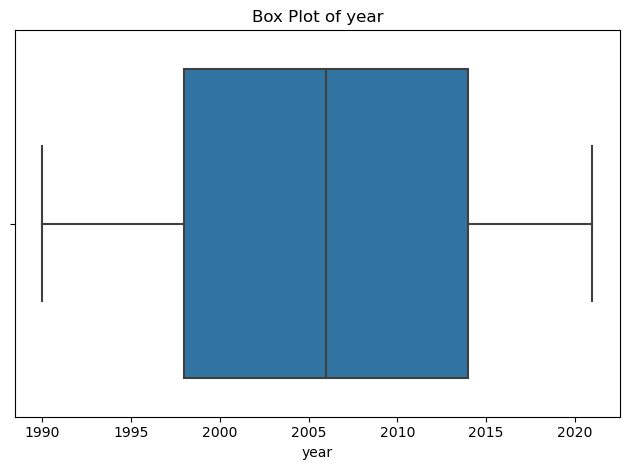

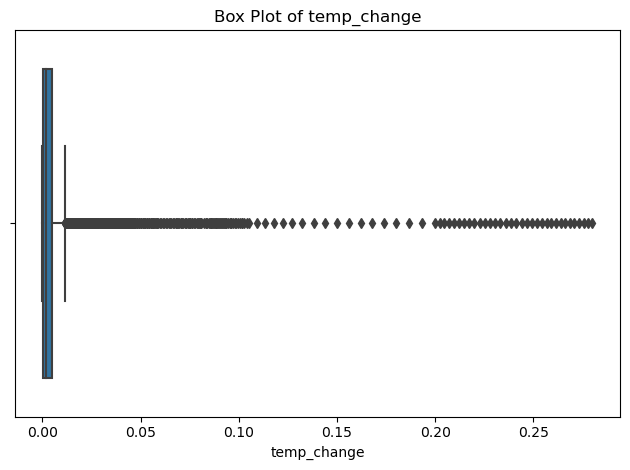

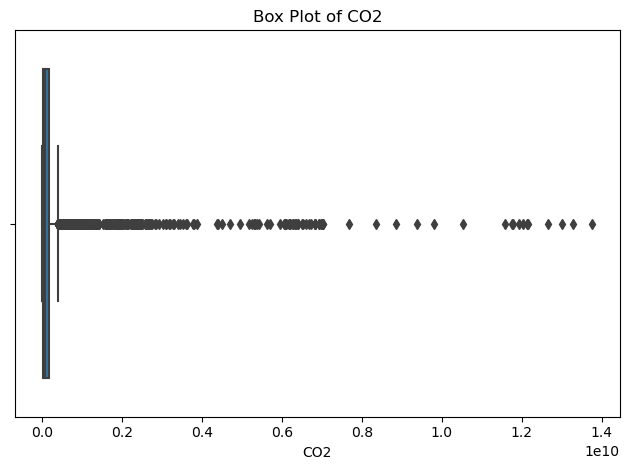

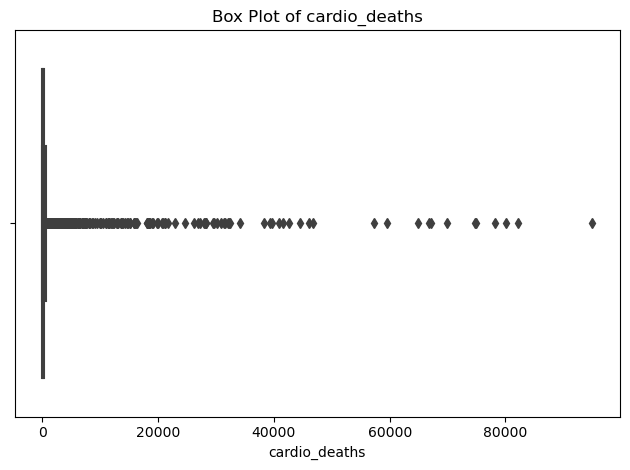

In [193]:
for col in df_cleaned.select_dtypes(exclude="object"):
    sns.boxplot(x=df_cleaned[col].dropna())
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

### Box Plot of Cardio Deaths
- **Observation**: The box plot indicates a high number of outliers in the cardio deaths data, with many values extending far beyond the interquartile range.
- **Recommendation**: 
  - Investigate the outliers to understand the reasons behind the high number of cardio deaths in those instances. They might be due to specific events or anomalies.
  - Consider applying transformations (e.g., logarithmic) to the data or using robust statistical methods that are less affected by outliers for further analysis.

### Scatter Plot of Temperature Change vs CO2 with Cardio Deaths as Hue
- **Observation**: There is a visible trend that as CO2 levels and temperature change increase, cardio deaths also tend to increase. The darker hues representing higher cardio deaths are more concentrated in the higher ranges of CO2 and temperature change.
- **Recommendation**:
  - Investigate the causal relationships between these variables. Conduct regression analysis to quantify the impact of CO2 and temperature change on cardio deaths.
  - Consider conducting a time-series analysis to explore how these relationships evolve over time.
  - Implement policies and measures to reduce CO2 emissions and mitigate climate change, which could potentially reduce cardio deaths.

### Correlation Matrix Heatmap
- **Observation**: The correlation matrix shows:
  - A strong positive correlation (0.89) between temperature change and CO2.
  - A moderate positive correlation (0.49) between CO2 and cardio deaths.
  - A moderate positive correlation (0.35) between temperature change and cardio deaths.
- **Recommendation**:
  - Use these correlations to prioritize which variables to include in predictive models for cardio deaths.
  - Focus on reducing CO2 emissions as it has a strong correlation with temperature change and a moderate correlation with cardio deaths.
  - Investigate other factors that might contribute to cardio deaths for a more comprehensive understanding.

### Pair Plot
- **Observation**: The pair plot provides a comprehensive view of the distributions and relationships between the variables (year, temperature change, CO2, cardio deaths). Notable observations include:
  - An increasing trend in temperature change and CO2 over the years.
  - A scattered yet upward trend in cardio deaths with increasing CO2 and temperature change.
- **Recommendation**:
  - Perform multivariate analysis to explore the combined effect of temperature change and CO2 on cardio deaths.
  - Use the pair plot to identify potential nonlinear relationships and consider advanced modeling techniques (e.g., machine learning) that can capture these complexities.

### General Recommendations:
1. **Data Quality**: Ensure the data used for these analyses is of high quality, accurate, and up-to-date.
2. **Public Health Policies**: Implement public health policies aimed at mitigating the effects of climate change on health, particularly cardiovascular health.
3. **Further Research**: Conduct further research to identify other potential variables that might influence cardio deaths and to understand the mechanisms behind the observed correlations.

In [ ]:
# Removing Outliers to reduce skewness in the data
# The funtion below is written to handle outliers

def remove_outliers_iqr(df, columns):
    """
    Remove outliers from a DataFrame using the IQR method.
    
    Args:
    df (pandas.DataFrame): The input DataFrame.
    columns (list of str): List of column names to check for outliers.
    
    Returns:
    pandas.DataFrame: A DataFrame with outliers removed.
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [192]:
# Apply the inter quantile range method of dealing with outliers

numerical_columns = ['temp_change', 'CO2', 'cardio_deaths']
df_no_outliers = remove_outliers_iqr(df_cleaned, numerical_columns)

In [190]:
df_no_outliers.head()

,year,code,temp_change,CO2,cardio_deaths
1,1991,AFG,0.000891,14436271.0,266.298725
2,1992,AFG,0.000891,13517736.0,224.447196
3,1993,AFG,0.000890,12913293.0,278.393699
6,1996,AFG,0.000888,16127630.0,315.446081
14,2004,AFG,0.000936,20214652.0,332.240918


In [209]:
# save the cleaned and processed data to csv to be used in the Model notebook

df_no_outliers.to_csv(r"C:\Users\rave_consolidate\Desktop\cadiovascular_death\dataset\trainset.csv", index=False)
df_test.to_csv(r"C:\Users\rave_consolidate\Desktop\cadiovascular_death\dataset\testset.csv", index=False)

In [211]:
df_no_outliers.head()

,year,code,temp_change,CO2,cardio_deaths
1,1991,AFG,0.000891,14436271.0,266.298725
2,1992,AFG,0.000891,13517736.0,224.447196
3,1993,AFG,0.000890,12913293.0,278.393699
6,1996,AFG,0.000888,16127630.0,315.446081
14,2004,AFG,0.000936,20214652.0,332.240918


In [210]:
df_test.head()

,year,code,temp_change,CO2
0,2022,ESP,4.248217e-06,306905.00
1,2022,ESP,5.498951e-07,55276.00
2,2022,ESP,5.412198e-05,4333367.00
3,2022,ESP,1.100690e-06,51516.69
4,2022,ESP,2.369140e-07,13152.00
